📊 Loading diabetes dataset...

📋 Dataset Information:
Number of patients: 768
Number of features: 8
Diabetic patients: 268 (34.9%)

📊 Feature statistics:
       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  \
count       768.00   768.00         768.00         768.00   768.00  768.00   
mean          3.85   120.89          69.11          20.54    79.80   31.99   
std           3.37    31.97          19.36          15.95   115.24    7.88   
min           0.00     0.00           0.00           0.00     0.00    0.00   
25%           1.00    99.00          62.00           0.00     0.00   27.30   
50%           3.00   117.00          72.00          23.00    30.50   32.00   
75%           6.00   140.25          80.00          32.00   127.25   36.60   
max          17.00   199.00         122.00          99.00   846.00   67.10   

       DiabetesPedigreeFunction     Age  Outcome  
count                    768.00  768.00   768.00  
mean                       0.47   33.24  

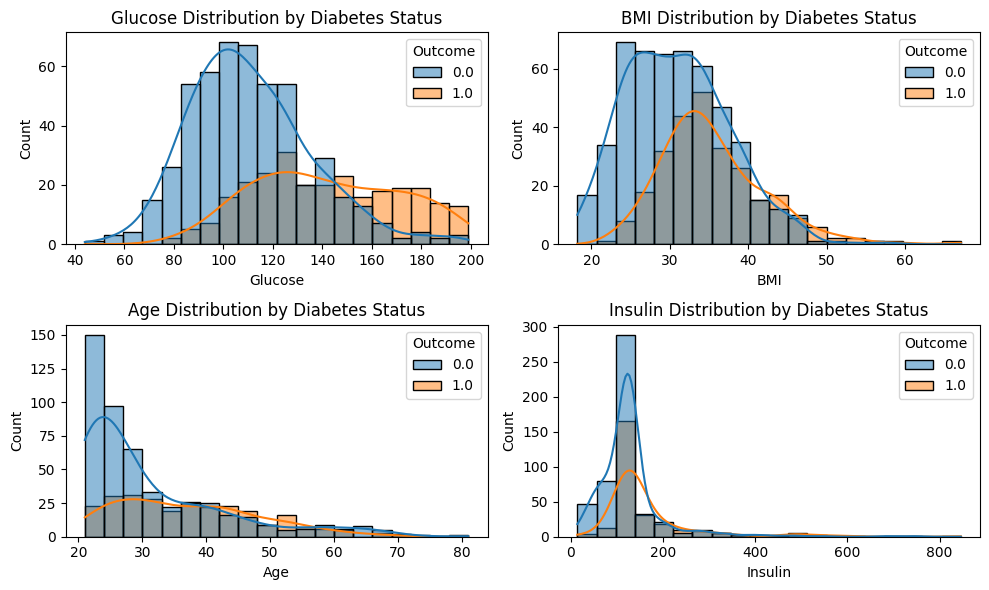

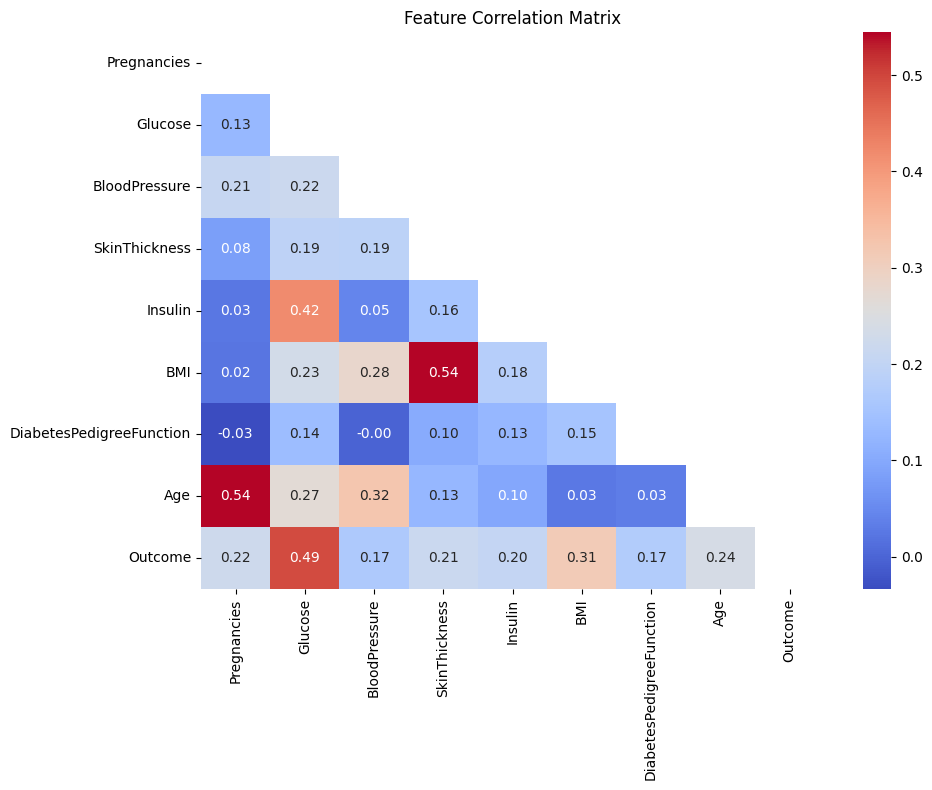


🧪 Creating a simple composite risk score...


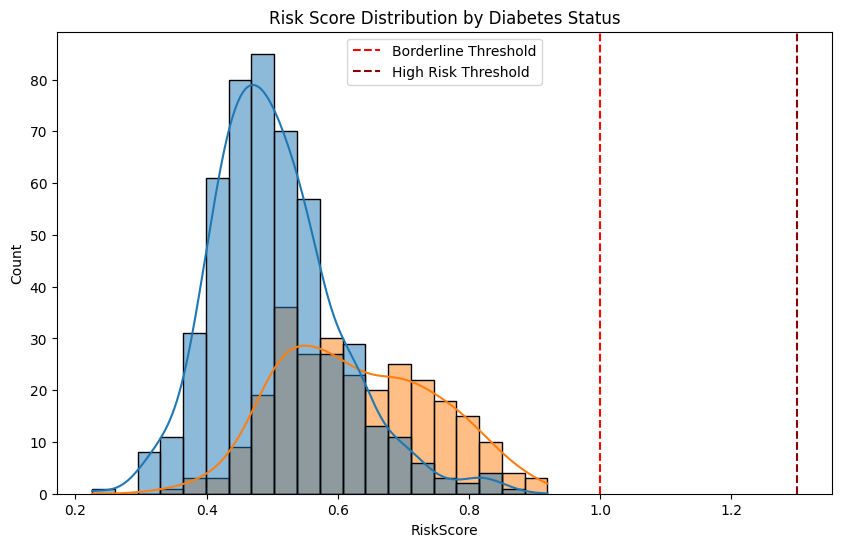


🔧 Preparing features and target variable...

🧠 Training Random Forest model...

📈 Evaluating model...
Model Accuracy: 0.7532

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.83      0.81        99
         1.0       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



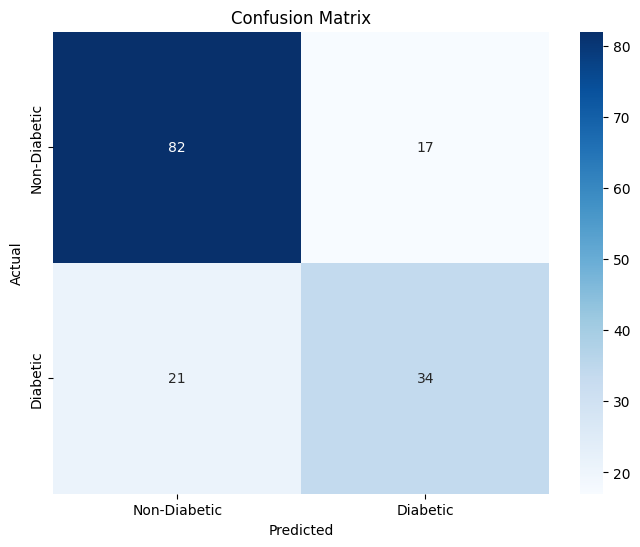


🔍 Feature Importance Ranking:
                          importance
Glucose                     0.336796
BMI                         0.181367
Age                         0.149758
Insulin                     0.105626
DiabetesPedigreeFunction    0.074251
Pregnancies                 0.056008
SkinThickness               0.050279
BloodPressure               0.045914


<Figure size 1000x600 with 0 Axes>

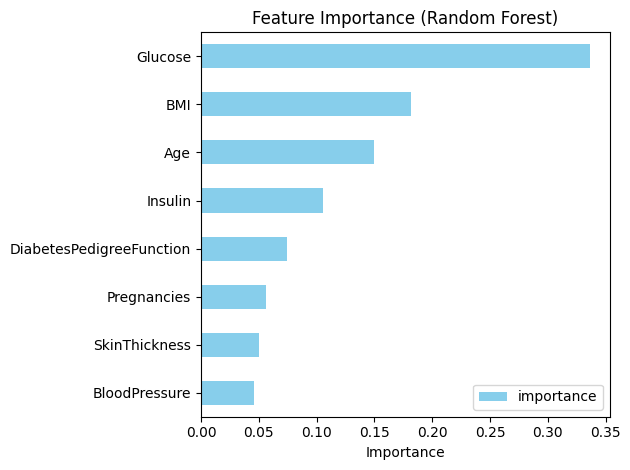


🩺 Diabetes Risk Prediction System 🩺
Enter patient details to predict diabetes risk
(Enter 'q' to quit)
Enter Pregnancies (or press Enter for median value): 8
Enter Glucose (or press Enter for median value): 180
Enter BloodPressure (or press Enter for median value): 82
Enter SkinThickness (or press Enter for median value): 35
Enter Insulin (or press Enter for median value): 0
Enter BMI (or press Enter for median value): 33.2
Enter DiabetesPedigreeFunction (or press Enter for median value): 0.72
Enter Age (or press Enter for median value): 54

📊 Results 📊
Risk Score: 0.87
Prediction Probability: 0.69
✅ Risk Level: Low Risk
Model Prediction: Diabetic

🔎 Key Risk Factors:
1. Glucose: 180.0 ↑ (increases risk)
   High glucose levels can indicate diabetes.
2. Age: 54.0 ↑ (increases risk)
   Risk of type 2 diabetes increases with age.
3. Insulin: 0.0 ↓ (decreases risk)

Would you like to check another patient? (y/n): n

✅ Thank you for using the Diabetes Risk Prediction System!


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def main():
    # Load data
    print("📊 Loading diabetes dataset...")
    url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
    df = pd.read_csv(url)

    # Display basic information about the dataset
    print("\n📋 Dataset Information:")
    print(f"Number of patients: {len(df)}")
    print(f"Number of features: {len(df.columns) - 1}")  # -1 for outcome column
    print(f"Diabetic patients: {df['Outcome'].sum()} ({df['Outcome'].mean()*100:.1f}%)")

    # Basic exploration
    print("\n📊 Feature statistics:")
    print(df.describe().round(2))

    # Data Preprocessing
    print("\n🧹 Preprocessing data...")
    # Replace zeros with NaN in these columns (zeros typically represent missing values in these fields)
    zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
    for column in zero_columns:
        df[column] = df[column].replace(0, np.nan)

    # Impute missing values using median
    imputer = SimpleImputer(strategy='median')
    df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

    # Create a simple visualization of the data
    plt.figure(figsize=(10, 6))
    for i, feature in enumerate(['Glucose', 'BMI', 'Age', 'Insulin']):
        plt.subplot(2, 2, i+1)
        sns.histplot(data=df_imputed, x=feature, hue='Outcome', kde=True, bins=20)
        plt.title(f'{feature} Distribution by Diabetes Status')
    plt.tight_layout()
    plt.savefig('feature_distributions.png')
    plt.show()
    plt.close()

    # Correlation analysis
    plt.figure(figsize=(10, 8))
    correlation = df_imputed.corr()
    mask = np.triu(correlation)
    sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', mask=mask)
    plt.title('Feature Correlation Matrix')
    plt.tight_layout()
    plt.savefig('correlation_matrix.png')
    plt.show()
    plt.close()

    # Create a simple composite risk score - this makes it easier to explain
    print("\n🧪 Creating a simple composite risk score...")
    # These weights are based on domain knowledge about diabetes risk factors
    df_imputed['RiskScore'] = (
        df_imputed['Glucose'] * 0.4 +      # High glucose has strong correlation
        df_imputed['BMI'] * 0.3 +          # BMI is an important factor
        df_imputed['Age'] * 0.1 +          # Age increases risk
        df_imputed['Insulin'] * (-0.05) +  # Low insulin can indicate diabetes
        df_imputed['DiabetesPedigreeFunction'] * 0.15  # Family history matters
    ) / 100  # Normalize to a reasonable range

    # Visualize risk score distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_imputed, x='RiskScore', hue='Outcome', kde=True, bins=20)
    plt.title('Risk Score Distribution by Diabetes Status')
    plt.axvline(x=1.0, color='red', linestyle='--', label='Borderline Threshold')
    plt.axvline(x=1.3, color='darkred', linestyle='--', label='High Risk Threshold')
    plt.legend()
    plt.savefig('risk_score.png')
    plt.show()
    plt.close()

    # Prepare data for modeling
    print("\n🔧 Preparing features and target variable...")
    X = df_imputed.drop(["Outcome", "RiskScore"], axis=1)
    y = df_imputed["Outcome"]

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train model - using just one model for simplicity
    print("\n🧠 Training Random Forest model...")
    # Random Forest
    model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
    model.fit(X_train_scaled, y_train)

    # Model Evaluation
    print("\n📈 Evaluating model...")
    # Predictions
    y_pred = model.predict(X_test_scaled)

    # Accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {accuracy:.4f}")

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Non-Diabetic', 'Diabetic'],
                yticklabels=['Non-Diabetic', 'Diabetic'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.savefig('confusion_matrix.png')
    plt.show()
    plt.close()

    # Feature Importance Analysis
    feature_importances = pd.DataFrame(
        model.feature_importances_,
        index=X.columns,
        columns=['importance']
    ).sort_values('importance', ascending=False)

    print("\n🔍 Feature Importance Ranking:")
    print(feature_importances)

    plt.figure(figsize=(10, 6))
    feature_importances.sort_values('importance').plot(kind='barh', color='skyblue')
    plt.title('Feature Importance (Random Forest)')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.savefig('feature_importance.png')
    plt.show()
    plt.close()

    # Interactive prediction system
    while True:
        print("\n🩺 Diabetes Risk Prediction System 🩺")
        print("Enter patient details to predict diabetes risk")
        print("(Enter 'q' to quit)")

        # Get user input
        input_data = {}
        features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                   'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

        for feature in features:
            value = input(f"Enter {feature} (or press Enter for median value): ")
            if value.lower() == 'q':
                return

            if value == "":
                input_data[feature] = df_imputed[feature].median()
                print(f"Using median value for {feature}: {df_imputed[feature].median():.1f}")
            else:
                try:
                    input_data[feature] = float(value)
                except ValueError:
                    print(f"Invalid input for {feature}. Using median value.")
                    input_data[feature] = df_imputed[feature].median()

        # Create DataFrame from user input
        user_df = pd.DataFrame([input_data])

        # Calculate risk score manually
        risk_score = (
            user_df['Glucose'].values[0] * 0.4 +
            user_df['BMI'].values[0] * 0.3 +
            user_df['Age'].values[0] * 0.1 +
            user_df['Insulin'].values[0] * (-0.05) +
            user_df['DiabetesPedigreeFunction'].values[0] * 0.15
        ) / 100

        # Scale the input for the model
        user_scaled = scaler.transform(user_df)

        # Make prediction
        prediction_proba = model.predict_proba(user_scaled)[0, 1]
        prediction = 1 if prediction_proba >= 0.5 else 0

        # Define risk level
        if risk_score < 1.0:
            risk_level = "Low Risk"
            emoji = "✅"
        elif risk_score < 1.3:
            risk_level = "Borderline Risk"
            emoji = "⚠️"
        else:
            risk_level = "High Risk"
            emoji = "🚨"

        # Output results
        print("\n📊 Results 📊")
        print(f"Risk Score: {risk_score:.2f}")
        print(f"Prediction Probability: {prediction_proba:.2f}")
        print(f"{emoji} Risk Level: {risk_level}")
        print(f"Model Prediction: {'Diabetic' if prediction == 1 else 'Non-Diabetic'}")

        # Explain the key factors
        print("\n🔎 Key Risk Factors:")

        # Identify important factors for this patient
        factor_contributions = []
        for i, feature in enumerate(features):
            # Get normalized value (how far from average)
            raw_value = user_df[feature].values[0]
            avg_value = df_imputed[feature].mean()
            std_value = df_imputed[feature].std()
            z_score = (raw_value - avg_value) / std_value

            # Get feature importance
            importance = model.feature_importances_[i]

            # Calculate contribution (higher = more concerning)
            contribution = z_score * importance

            factor_contributions.append((feature, raw_value, importance, contribution))

        # Sort by absolute contribution
        factor_contributions.sort(key=lambda x: abs(x[3]), reverse=True)

        # Display the top 3 factors
        for i, (feature, value, importance, contribution) in enumerate(factor_contributions[:3]):
            # Determine if this factor increases or decreases risk
            if contribution > 0:
                direction = "increases"
                arrow = "↑"
            else:
                direction = "decreases"
                arrow = "↓"

            print(f"{i+1}. {feature}: {value:.1f} {arrow} ({direction} risk)")

            # Add detail for important factors
            if feature == "Glucose":
                if value > 140:
                    print("   High glucose levels can indicate diabetes.")
                elif value < 70:
                    print("   Low glucose levels are generally good for diabetes risk.")
            elif feature == "BMI":
                if value > 30:
                    print("   BMI above 30 is classified as obese, increasing diabetes risk.")
                elif value < 25:
                    print("   BMI below 25 is healthy, lowering diabetes risk.")
            elif feature == "Age":
                if value > 40:
                    print("   Risk of type 2 diabetes increases with age.")
            elif feature == "DiabetesPedigreeFunction":
                if value > 0.5:
                    print("   Higher value indicates stronger family history of diabetes.")

        # Ask if the user wants to check another patient
        check_another = input("\nWould you like to check another patient? (y/n): ")
        if check_another.lower() != 'y':
            break

    print("\n✅ Thank you for using the Diabetes Risk Prediction System!")

if __name__ == "__main__":
    main()